### Dealing with image data in deep learning
> In this exercise, we are trying to import images from the imgs folders
> 
> using ImageDataGenerator and augmenting them with rotation, zoom and
> 
> changing the lighting conditions

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

Found 559 images belonging to 3 classes.


Run #0
found key n02085936-Maltese_dog
img shape (3, 244, 244, 3)
img label n02085936-Maltese_dog

Run #1
found key n02085782-Japanese_spaniel
img shape (3, 244, 244, 3)
img label n02085782-Japanese_spaniel

Run #2
found key n02085936-Maltese_dog
img shape (3, 244, 244, 3)
img label n02085936-Maltese_dog



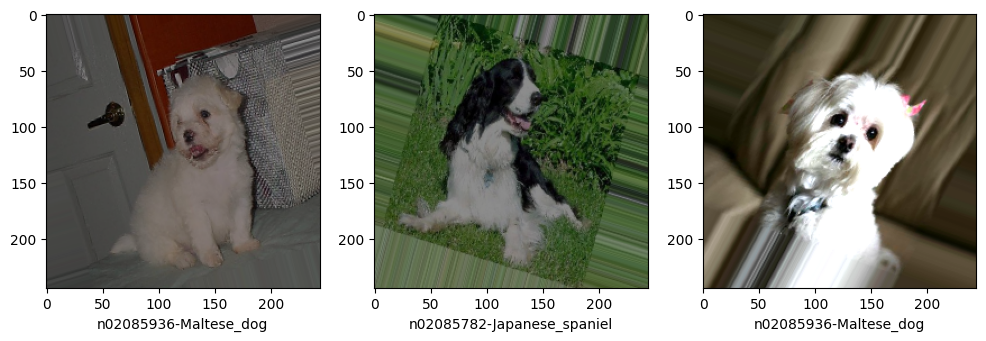

In [125]:
NUM_IMG = 3 # number of images to batch

# We need rescale the image when using ImageDataGenerator
# so that mathplotlib can display it
image_gen = ImageDataGenerator(
    rotation_range=45, 
    horizontal_flip=True, 
    rescale=(1/255),
    brightness_range=(0.5,1.5),
    zoom_range = [1, 1.5])

if not os.path.exists('output/'):
    print('creating output folder')
    os.mkdir('output/')

iter_img = image_gen.flow_from_directory(
    'imgs/',
    target_size = (244, 244),
    batch_size=NUM_IMG,
    shuffle = True,
    save_to_dir="output/",
    save_prefix="",
    save_format='png',    
)

# define the figure plot area
fig, ax = plt.subplots(1,NUM_IMG, figsize=(12,4))

# matches and return the key corresponding to the value
def find_key(v, dict):
    for key,value in dict.items():
        if v == value:
            print (f'found key {key}')
            return key


for i in range(NUM_IMG):
    print(f'Run #{i}')
    img, label = iter_img.next()
    ax[i].imshow(img[0])
    classval = np.argmax(label[0], axis = 0)    # convert one-hot encoding to index
    classkey = find_key(classval, iter_img.class_indices) # get class key from index value
    ax[i].set_xlabel(classkey)  # label the image
    print(f'img shape {img.shape}')
    print(f'img label {classkey}\n')

plt.show()


